# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

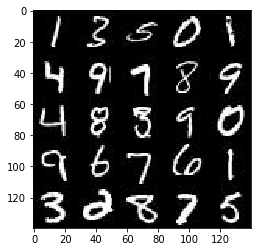

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

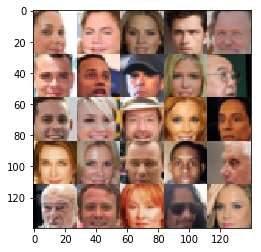

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/home/aind2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate_placeholder = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate_placeholder


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):        
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    # name variable scope 'discriminator' for building GAN model
    with tf.variable_scope('discriminator', reuse=reuse):
        # input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # first fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # reshape it to start convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x64
                                
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
                
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
import numpy as np

def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real) * np.random.uniform(0.7, 1.2)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    tf.reset_default_graph()
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, learning_rate_placeholder = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, 
                                               input_z: batch_z, 
                                               learning_rate_placeholder: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, 
                                               input_z: batch_z, 
                                               learning_rate_placeholder: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, 
                                                input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 20, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.2644... Generator Loss: 7.4878
Epoch 1/2... Discriminator Loss: 1.8184... Generator Loss: 0.6760
Epoch 1/2... Discriminator Loss: 1.5354... Generator Loss: 2.4951
Epoch 1/2... Discriminator Loss: 1.6116... Generator Loss: 1.8790
Epoch 1/2... Discriminator Loss: 1.8408... Generator Loss: 1.7566
Epoch 1/2... Discriminator Loss: 2.1038... Generator Loss: 1.3977
Epoch 1/2... Discriminator Loss: 1.8004... Generator Loss: 1.4703
Epoch 1/2... Discriminator Loss: 1.5992... Generator Loss: 1.3207
Epoch 1/2... Discriminator Loss: 1.6860... Generator Loss: 1.5753
Epoch 1/2... Discriminator Loss: 1.6285... Generator Loss: 1.4205


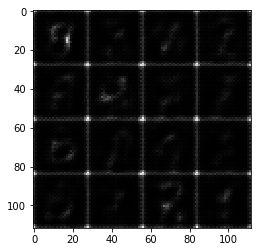

Epoch 1/2... Discriminator Loss: 1.7176... Generator Loss: 1.2107
Epoch 1/2... Discriminator Loss: 1.6081... Generator Loss: 1.3323
Epoch 1/2... Discriminator Loss: 1.5174... Generator Loss: 1.0507
Epoch 1/2... Discriminator Loss: 1.6709... Generator Loss: 1.5579
Epoch 1/2... Discriminator Loss: 1.3321... Generator Loss: 1.2170
Epoch 1/2... Discriminator Loss: 1.5346... Generator Loss: 0.8847
Epoch 1/2... Discriminator Loss: 1.6619... Generator Loss: 1.6220
Epoch 1/2... Discriminator Loss: 1.3926... Generator Loss: 0.8425
Epoch 1/2... Discriminator Loss: 1.4756... Generator Loss: 1.1932
Epoch 1/2... Discriminator Loss: 1.3677... Generator Loss: 1.1052


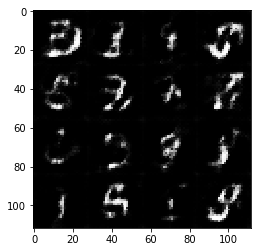

Epoch 1/2... Discriminator Loss: 1.4952... Generator Loss: 1.3682
Epoch 1/2... Discriminator Loss: 1.2227... Generator Loss: 0.7882
Epoch 1/2... Discriminator Loss: 1.5334... Generator Loss: 0.4509
Epoch 1/2... Discriminator Loss: 2.0524... Generator Loss: 0.2462
Epoch 1/2... Discriminator Loss: 1.7370... Generator Loss: 0.3388
Epoch 1/2... Discriminator Loss: 1.1984... Generator Loss: 0.7122
Epoch 1/2... Discriminator Loss: 2.1398... Generator Loss: 2.9810
Epoch 1/2... Discriminator Loss: 1.4748... Generator Loss: 1.4076
Epoch 1/2... Discriminator Loss: 1.3140... Generator Loss: 1.0882
Epoch 1/2... Discriminator Loss: 1.4338... Generator Loss: 1.1923


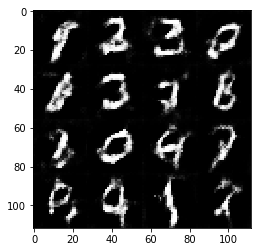

Epoch 1/2... Discriminator Loss: 1.4072... Generator Loss: 1.3014
Epoch 1/2... Discriminator Loss: 1.4174... Generator Loss: 1.3541
Epoch 1/2... Discriminator Loss: 1.0440... Generator Loss: 0.9067
Epoch 1/2... Discriminator Loss: 1.5627... Generator Loss: 0.4432
Epoch 1/2... Discriminator Loss: 1.7461... Generator Loss: 0.3491
Epoch 1/2... Discriminator Loss: 1.7298... Generator Loss: 0.3411
Epoch 1/2... Discriminator Loss: 1.6493... Generator Loss: 0.3837
Epoch 1/2... Discriminator Loss: 1.2405... Generator Loss: 0.6480
Epoch 1/2... Discriminator Loss: 1.5446... Generator Loss: 0.4400
Epoch 1/2... Discriminator Loss: 1.4041... Generator Loss: 0.5675


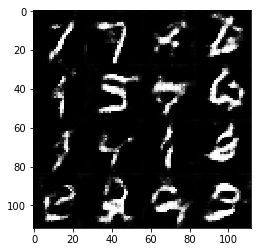

Epoch 1/2... Discriminator Loss: 1.1019... Generator Loss: 2.3916
Epoch 1/2... Discriminator Loss: 1.3550... Generator Loss: 1.1347
Epoch 1/2... Discriminator Loss: 1.6036... Generator Loss: 0.3907
Epoch 1/2... Discriminator Loss: 1.4387... Generator Loss: 0.5127
Epoch 1/2... Discriminator Loss: 1.2588... Generator Loss: 0.7309
Epoch 1/2... Discriminator Loss: 1.2953... Generator Loss: 0.6865
Epoch 1/2... Discriminator Loss: 1.5551... Generator Loss: 0.4241
Epoch 1/2... Discriminator Loss: 1.0629... Generator Loss: 1.6861
Epoch 1/2... Discriminator Loss: 1.2756... Generator Loss: 1.4426
Epoch 1/2... Discriminator Loss: 1.2329... Generator Loss: 0.9577


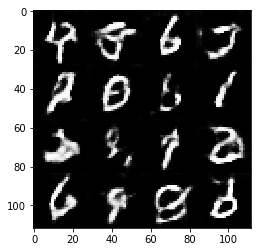

Epoch 1/2... Discriminator Loss: 1.3729... Generator Loss: 1.0483
Epoch 1/2... Discriminator Loss: 1.4769... Generator Loss: 1.5635
Epoch 1/2... Discriminator Loss: 1.4231... Generator Loss: 1.4942
Epoch 1/2... Discriminator Loss: 1.2940... Generator Loss: 1.0633
Epoch 1/2... Discriminator Loss: 1.3025... Generator Loss: 0.8964
Epoch 1/2... Discriminator Loss: 1.2030... Generator Loss: 0.9479
Epoch 1/2... Discriminator Loss: 1.9994... Generator Loss: 0.2505
Epoch 1/2... Discriminator Loss: 1.3652... Generator Loss: 0.7506
Epoch 1/2... Discriminator Loss: 1.4511... Generator Loss: 1.4693
Epoch 1/2... Discriminator Loss: 1.3855... Generator Loss: 1.4859


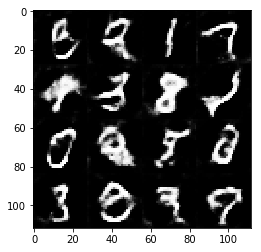

Epoch 1/2... Discriminator Loss: 1.3479... Generator Loss: 1.2178
Epoch 1/2... Discriminator Loss: 1.4249... Generator Loss: 1.2458
Epoch 1/2... Discriminator Loss: 1.1990... Generator Loss: 1.5166
Epoch 1/2... Discriminator Loss: 1.6036... Generator Loss: 0.4096
Epoch 1/2... Discriminator Loss: 1.3501... Generator Loss: 0.5981
Epoch 1/2... Discriminator Loss: 1.7116... Generator Loss: 0.3674
Epoch 1/2... Discriminator Loss: 1.2293... Generator Loss: 0.8216
Epoch 1/2... Discriminator Loss: 1.4039... Generator Loss: 1.5243
Epoch 1/2... Discriminator Loss: 1.4421... Generator Loss: 1.3736
Epoch 1/2... Discriminator Loss: 1.2565... Generator Loss: 1.6505


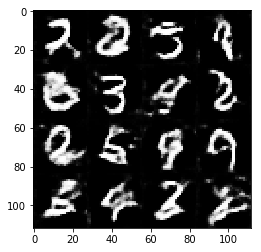

Epoch 1/2... Discriminator Loss: 1.5519... Generator Loss: 1.2714
Epoch 1/2... Discriminator Loss: 1.3064... Generator Loss: 1.3927
Epoch 1/2... Discriminator Loss: 1.2533... Generator Loss: 1.4462
Epoch 1/2... Discriminator Loss: 1.4855... Generator Loss: 0.4806
Epoch 1/2... Discriminator Loss: 1.6632... Generator Loss: 0.3700
Epoch 1/2... Discriminator Loss: 1.4832... Generator Loss: 0.4686
Epoch 1/2... Discriminator Loss: 1.8555... Generator Loss: 0.2917
Epoch 1/2... Discriminator Loss: 1.2288... Generator Loss: 0.7939
Epoch 1/2... Discriminator Loss: 1.3029... Generator Loss: 1.2674
Epoch 1/2... Discriminator Loss: 1.2907... Generator Loss: 1.3807


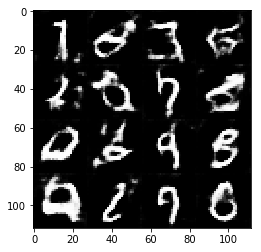

Epoch 1/2... Discriminator Loss: 1.6859... Generator Loss: 0.3611
Epoch 1/2... Discriminator Loss: 1.3200... Generator Loss: 0.5804
Epoch 1/2... Discriminator Loss: 1.6190... Generator Loss: 0.3879
Epoch 1/2... Discriminator Loss: 1.3309... Generator Loss: 1.4439
Epoch 1/2... Discriminator Loss: 1.3093... Generator Loss: 1.1979
Epoch 1/2... Discriminator Loss: 1.0860... Generator Loss: 1.3772
Epoch 1/2... Discriminator Loss: 1.3285... Generator Loss: 1.4703
Epoch 1/2... Discriminator Loss: 1.1597... Generator Loss: 1.4431
Epoch 1/2... Discriminator Loss: 1.3184... Generator Loss: 1.1971
Epoch 1/2... Discriminator Loss: 1.2224... Generator Loss: 1.2479


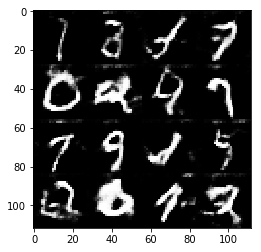

Epoch 1/2... Discriminator Loss: 1.1007... Generator Loss: 0.9269
Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 1.4278
Epoch 1/2... Discriminator Loss: 1.1593... Generator Loss: 1.2854
Epoch 1/2... Discriminator Loss: 1.5756... Generator Loss: 0.4366
Epoch 1/2... Discriminator Loss: 1.3344... Generator Loss: 0.5494
Epoch 1/2... Discriminator Loss: 1.5843... Generator Loss: 0.4185
Epoch 1/2... Discriminator Loss: 1.5706... Generator Loss: 0.4902
Epoch 1/2... Discriminator Loss: 2.0716... Generator Loss: 0.2517
Epoch 1/2... Discriminator Loss: 1.0441... Generator Loss: 1.2542
Epoch 1/2... Discriminator Loss: 1.0506... Generator Loss: 1.2199


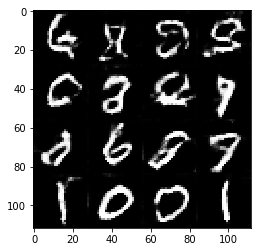

Epoch 1/2... Discriminator Loss: 2.1914... Generator Loss: 0.2092
Epoch 1/2... Discriminator Loss: 1.3012... Generator Loss: 0.6567
Epoch 1/2... Discriminator Loss: 1.5024... Generator Loss: 1.8887
Epoch 1/2... Discriminator Loss: 1.1463... Generator Loss: 1.3432
Epoch 1/2... Discriminator Loss: 1.2309... Generator Loss: 1.4528
Epoch 1/2... Discriminator Loss: 1.1588... Generator Loss: 1.3927
Epoch 1/2... Discriminator Loss: 1.2188... Generator Loss: 1.0411
Epoch 1/2... Discriminator Loss: 1.4129... Generator Loss: 1.7291
Epoch 1/2... Discriminator Loss: 1.2225... Generator Loss: 1.6979
Epoch 1/2... Discriminator Loss: 1.2691... Generator Loss: 1.2699


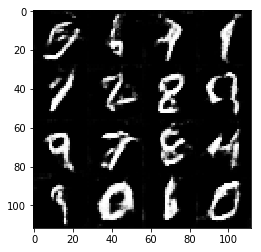

Epoch 1/2... Discriminator Loss: 1.2070... Generator Loss: 1.4386
Epoch 1/2... Discriminator Loss: 1.2589... Generator Loss: 1.8575
Epoch 1/2... Discriminator Loss: 1.0896... Generator Loss: 1.3879
Epoch 1/2... Discriminator Loss: 1.3155... Generator Loss: 0.5662
Epoch 1/2... Discriminator Loss: 1.5262... Generator Loss: 0.4706
Epoch 1/2... Discriminator Loss: 0.9748... Generator Loss: 1.0135
Epoch 1/2... Discriminator Loss: 1.4257... Generator Loss: 1.9881
Epoch 1/2... Discriminator Loss: 1.2108... Generator Loss: 1.7531
Epoch 1/2... Discriminator Loss: 1.4722... Generator Loss: 0.4720
Epoch 1/2... Discriminator Loss: 1.4107... Generator Loss: 0.5332


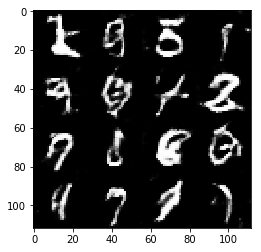

Epoch 1/2... Discriminator Loss: 1.0494... Generator Loss: 1.5250
Epoch 1/2... Discriminator Loss: 1.1400... Generator Loss: 1.2664
Epoch 1/2... Discriminator Loss: 1.3614... Generator Loss: 0.5949
Epoch 1/2... Discriminator Loss: 1.5792... Generator Loss: 0.4190
Epoch 1/2... Discriminator Loss: 1.6532... Generator Loss: 0.3877
Epoch 1/2... Discriminator Loss: 1.6115... Generator Loss: 0.3874
Epoch 1/2... Discriminator Loss: 1.8084... Generator Loss: 0.3215
Epoch 1/2... Discriminator Loss: 1.0696... Generator Loss: 0.8637
Epoch 1/2... Discriminator Loss: 0.9511... Generator Loss: 1.6438
Epoch 1/2... Discriminator Loss: 0.9747... Generator Loss: 1.0980


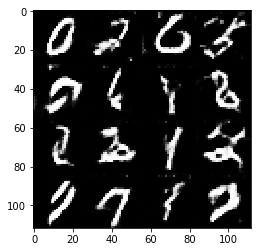

Epoch 1/2... Discriminator Loss: 1.2920... Generator Loss: 1.8893
Epoch 1/2... Discriminator Loss: 1.3886... Generator Loss: 1.6263
Epoch 1/2... Discriminator Loss: 1.2113... Generator Loss: 0.7887
Epoch 1/2... Discriminator Loss: 1.2668... Generator Loss: 0.7118
Epoch 1/2... Discriminator Loss: 1.3909... Generator Loss: 0.6292
Epoch 1/2... Discriminator Loss: 1.4427... Generator Loss: 0.4921
Epoch 1/2... Discriminator Loss: 1.8800... Generator Loss: 0.3255
Epoch 1/2... Discriminator Loss: 1.5145... Generator Loss: 0.4555
Epoch 1/2... Discriminator Loss: 0.9386... Generator Loss: 1.6903
Epoch 1/2... Discriminator Loss: 1.7524... Generator Loss: 0.3424


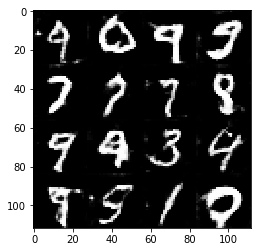

Epoch 1/2... Discriminator Loss: 1.0033... Generator Loss: 0.9954
Epoch 1/2... Discriminator Loss: 1.3889... Generator Loss: 0.5542
Epoch 1/2... Discriminator Loss: 1.1861... Generator Loss: 0.7267
Epoch 1/2... Discriminator Loss: 1.6778... Generator Loss: 0.3856
Epoch 1/2... Discriminator Loss: 1.3295... Generator Loss: 0.5659
Epoch 1/2... Discriminator Loss: 1.1706... Generator Loss: 0.7750
Epoch 1/2... Discriminator Loss: 1.1472... Generator Loss: 1.4144
Epoch 1/2... Discriminator Loss: 1.1821... Generator Loss: 0.7249
Epoch 1/2... Discriminator Loss: 1.0921... Generator Loss: 1.8266
Epoch 1/2... Discriminator Loss: 1.3548... Generator Loss: 0.6453


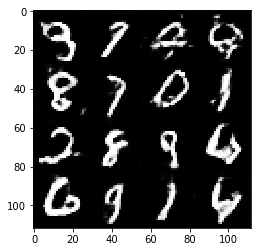

Epoch 1/2... Discriminator Loss: 1.3836... Generator Loss: 0.5091
Epoch 1/2... Discriminator Loss: 1.5045... Generator Loss: 0.4610
Epoch 1/2... Discriminator Loss: 0.9434... Generator Loss: 1.0483
Epoch 1/2... Discriminator Loss: 1.8901... Generator Loss: 0.2976
Epoch 1/2... Discriminator Loss: 1.5439... Generator Loss: 0.4410
Epoch 1/2... Discriminator Loss: 1.0167... Generator Loss: 0.9143
Epoch 1/2... Discriminator Loss: 1.2567... Generator Loss: 2.5201
Epoch 1/2... Discriminator Loss: 1.1104... Generator Loss: 0.7988
Epoch 1/2... Discriminator Loss: 1.5499... Generator Loss: 0.4779
Epoch 1/2... Discriminator Loss: 1.2088... Generator Loss: 0.6897


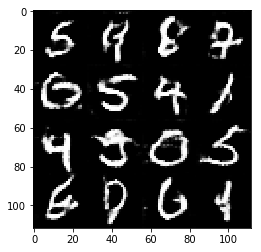

Epoch 1/2... Discriminator Loss: 1.3267... Generator Loss: 0.6416
Epoch 1/2... Discriminator Loss: 1.3242... Generator Loss: 0.6187
Epoch 1/2... Discriminator Loss: 2.2955... Generator Loss: 0.2123
Epoch 1/2... Discriminator Loss: 1.1717... Generator Loss: 0.9925
Epoch 1/2... Discriminator Loss: 1.4846... Generator Loss: 0.5140
Epoch 1/2... Discriminator Loss: 1.0223... Generator Loss: 0.9311
Epoch 1/2... Discriminator Loss: 1.5060... Generator Loss: 0.4803
Epoch 1/2... Discriminator Loss: 1.5368... Generator Loss: 0.4798
Epoch 1/2... Discriminator Loss: 0.8627... Generator Loss: 1.5763
Epoch 1/2... Discriminator Loss: 0.9351... Generator Loss: 1.1903


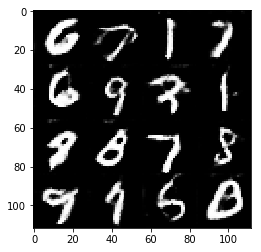

Epoch 1/2... Discriminator Loss: 1.2901... Generator Loss: 1.7381
Epoch 1/2... Discriminator Loss: 1.1245... Generator Loss: 1.1783
Epoch 1/2... Discriminator Loss: 1.0134... Generator Loss: 1.0605
Epoch 1/2... Discriminator Loss: 1.4081... Generator Loss: 0.5163
Epoch 1/2... Discriminator Loss: 1.2137... Generator Loss: 0.7119
Epoch 1/2... Discriminator Loss: 1.0490... Generator Loss: 0.9819
Epoch 1/2... Discriminator Loss: 0.9808... Generator Loss: 1.5235
Epoch 1/2... Discriminator Loss: 1.6643... Generator Loss: 0.3947
Epoch 1/2... Discriminator Loss: 1.7263... Generator Loss: 0.3898
Epoch 1/2... Discriminator Loss: 1.4876... Generator Loss: 0.4725


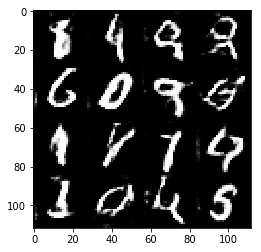

Epoch 1/2... Discriminator Loss: 1.1063... Generator Loss: 1.1771
Epoch 1/2... Discriminator Loss: 1.6413... Generator Loss: 0.4190
Epoch 1/2... Discriminator Loss: 0.9122... Generator Loss: 1.1453
Epoch 1/2... Discriminator Loss: 1.4684... Generator Loss: 0.5557
Epoch 1/2... Discriminator Loss: 1.0213... Generator Loss: 1.0025
Epoch 1/2... Discriminator Loss: 1.1908... Generator Loss: 0.7144
Epoch 1/2... Discriminator Loss: 0.9603... Generator Loss: 1.7447
Epoch 2/2... Discriminator Loss: 0.9675... Generator Loss: 1.0043
Epoch 2/2... Discriminator Loss: 1.0668... Generator Loss: 1.7330
Epoch 2/2... Discriminator Loss: 1.1546... Generator Loss: 1.3589


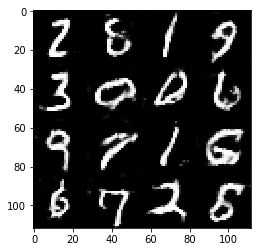

Epoch 2/2... Discriminator Loss: 1.4883... Generator Loss: 0.4985
Epoch 2/2... Discriminator Loss: 1.0928... Generator Loss: 0.8623
Epoch 2/2... Discriminator Loss: 1.7576... Generator Loss: 2.4208
Epoch 2/2... Discriminator Loss: 1.1505... Generator Loss: 0.7566
Epoch 2/2... Discriminator Loss: 1.2753... Generator Loss: 0.6960
Epoch 2/2... Discriminator Loss: 0.7597... Generator Loss: 1.4485
Epoch 2/2... Discriminator Loss: 1.0677... Generator Loss: 1.1089
Epoch 2/2... Discriminator Loss: 1.0561... Generator Loss: 0.8772
Epoch 2/2... Discriminator Loss: 0.9824... Generator Loss: 1.6736
Epoch 2/2... Discriminator Loss: 1.3969... Generator Loss: 0.6126


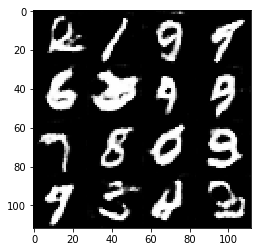

Epoch 2/2... Discriminator Loss: 0.9759... Generator Loss: 2.0529
Epoch 2/2... Discriminator Loss: 1.1932... Generator Loss: 1.9236
Epoch 2/2... Discriminator Loss: 1.1248... Generator Loss: 1.1457
Epoch 2/2... Discriminator Loss: 1.3132... Generator Loss: 0.5989
Epoch 2/2... Discriminator Loss: 1.6413... Generator Loss: 0.4631
Epoch 2/2... Discriminator Loss: 1.2027... Generator Loss: 0.7130
Epoch 2/2... Discriminator Loss: 1.5426... Generator Loss: 2.8754
Epoch 2/2... Discriminator Loss: 1.0535... Generator Loss: 1.1814
Epoch 2/2... Discriminator Loss: 1.9328... Generator Loss: 0.3995
Epoch 2/2... Discriminator Loss: 0.9817... Generator Loss: 1.2854


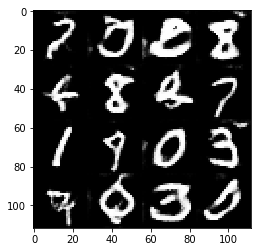

Epoch 2/2... Discriminator Loss: 0.9315... Generator Loss: 1.5979
Epoch 2/2... Discriminator Loss: 1.1686... Generator Loss: 1.5887
Epoch 2/2... Discriminator Loss: 1.7719... Generator Loss: 0.3687
Epoch 2/2... Discriminator Loss: 0.9692... Generator Loss: 0.9372
Epoch 2/2... Discriminator Loss: 1.0013... Generator Loss: 0.9591
Epoch 2/2... Discriminator Loss: 2.0987... Generator Loss: 0.2625
Epoch 2/2... Discriminator Loss: 1.4017... Generator Loss: 0.5428
Epoch 2/2... Discriminator Loss: 1.0128... Generator Loss: 0.9890
Epoch 2/2... Discriminator Loss: 1.6274... Generator Loss: 0.4185
Epoch 2/2... Discriminator Loss: 1.2557... Generator Loss: 0.7269


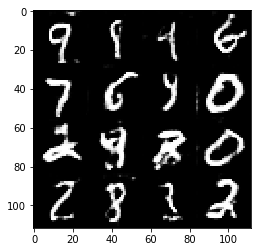

Epoch 2/2... Discriminator Loss: 1.0057... Generator Loss: 2.1599
Epoch 2/2... Discriminator Loss: 1.2464... Generator Loss: 2.1459
Epoch 2/2... Discriminator Loss: 1.0625... Generator Loss: 1.8375
Epoch 2/2... Discriminator Loss: 0.9415... Generator Loss: 1.1209
Epoch 2/2... Discriminator Loss: 1.5887... Generator Loss: 0.4322
Epoch 2/2... Discriminator Loss: 0.8875... Generator Loss: 1.6105
Epoch 2/2... Discriminator Loss: 0.9617... Generator Loss: 1.2113
Epoch 2/2... Discriminator Loss: 1.5952... Generator Loss: 2.4736
Epoch 2/2... Discriminator Loss: 1.1807... Generator Loss: 1.5379
Epoch 2/2... Discriminator Loss: 0.7690... Generator Loss: 1.6585


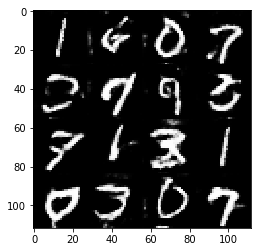

Epoch 2/2... Discriminator Loss: 0.7428... Generator Loss: 1.5236
Epoch 2/2... Discriminator Loss: 0.7583... Generator Loss: 1.3207
Epoch 2/2... Discriminator Loss: 2.2299... Generator Loss: 0.2443
Epoch 2/2... Discriminator Loss: 1.2972... Generator Loss: 0.6140
Epoch 2/2... Discriminator Loss: 1.0277... Generator Loss: 1.8719
Epoch 2/2... Discriminator Loss: 1.5126... Generator Loss: 0.5290
Epoch 2/2... Discriminator Loss: 0.8740... Generator Loss: 1.4574
Epoch 2/2... Discriminator Loss: 1.1370... Generator Loss: 0.7851
Epoch 2/2... Discriminator Loss: 0.5704... Generator Loss: 2.5645
Epoch 2/2... Discriminator Loss: 1.0877... Generator Loss: 0.9529


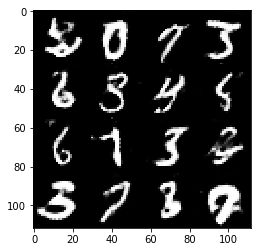

Epoch 2/2... Discriminator Loss: 2.5911... Generator Loss: 0.1722
Epoch 2/2... Discriminator Loss: 1.0474... Generator Loss: 1.5420
Epoch 2/2... Discriminator Loss: 1.6561... Generator Loss: 0.4782
Epoch 2/2... Discriminator Loss: 1.2171... Generator Loss: 0.6868
Epoch 2/2... Discriminator Loss: 0.9883... Generator Loss: 1.2378
Epoch 2/2... Discriminator Loss: 0.7140... Generator Loss: 1.5278
Epoch 2/2... Discriminator Loss: 1.5723... Generator Loss: 0.4854
Epoch 2/2... Discriminator Loss: 0.8201... Generator Loss: 1.5477
Epoch 2/2... Discriminator Loss: 2.0088... Generator Loss: 0.3121
Epoch 2/2... Discriminator Loss: 1.0140... Generator Loss: 0.9021


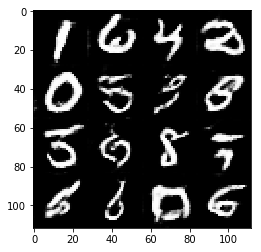

Epoch 2/2... Discriminator Loss: 0.7383... Generator Loss: 1.4278
Epoch 2/2... Discriminator Loss: 0.9159... Generator Loss: 1.1908
Epoch 2/2... Discriminator Loss: 1.5637... Generator Loss: 0.5149
Epoch 2/2... Discriminator Loss: 1.9532... Generator Loss: 0.3027
Epoch 2/2... Discriminator Loss: 1.4942... Generator Loss: 0.4786
Epoch 2/2... Discriminator Loss: 1.8762... Generator Loss: 0.3651
Epoch 2/2... Discriminator Loss: 1.1014... Generator Loss: 0.8124
Epoch 2/2... Discriminator Loss: 1.0030... Generator Loss: 1.0072
Epoch 2/2... Discriminator Loss: 0.8681... Generator Loss: 1.4583
Epoch 2/2... Discriminator Loss: 0.8883... Generator Loss: 1.1050


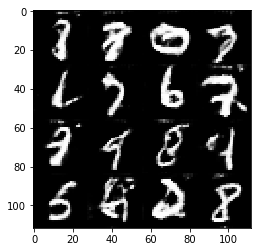

Epoch 2/2... Discriminator Loss: 1.6625... Generator Loss: 0.4264
Epoch 2/2... Discriminator Loss: 2.1131... Generator Loss: 0.2503
Epoch 2/2... Discriminator Loss: 1.0322... Generator Loss: 0.9523
Epoch 2/2... Discriminator Loss: 1.6015... Generator Loss: 0.5827
Epoch 2/2... Discriminator Loss: 0.9661... Generator Loss: 1.1984
Epoch 2/2... Discriminator Loss: 1.7765... Generator Loss: 0.4831
Epoch 2/2... Discriminator Loss: 0.7672... Generator Loss: 2.0323
Epoch 2/2... Discriminator Loss: 1.0456... Generator Loss: 1.0576
Epoch 2/2... Discriminator Loss: 1.1797... Generator Loss: 0.9241
Epoch 2/2... Discriminator Loss: 0.7380... Generator Loss: 1.4739


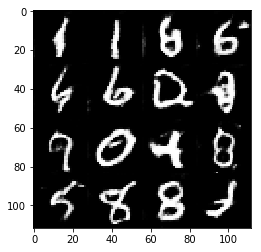

Epoch 2/2... Discriminator Loss: 0.7237... Generator Loss: 1.5923
Epoch 2/2... Discriminator Loss: 1.6539... Generator Loss: 0.4443
Epoch 2/2... Discriminator Loss: 1.3291... Generator Loss: 0.7387
Epoch 2/2... Discriminator Loss: 1.4631... Generator Loss: 0.5252
Epoch 2/2... Discriminator Loss: 1.1233... Generator Loss: 0.8024
Epoch 2/2... Discriminator Loss: 1.2015... Generator Loss: 0.8118
Epoch 2/2... Discriminator Loss: 1.7212... Generator Loss: 0.4843
Epoch 2/2... Discriminator Loss: 1.3112... Generator Loss: 0.6416
Epoch 2/2... Discriminator Loss: 0.8571... Generator Loss: 1.3362
Epoch 2/2... Discriminator Loss: 1.0223... Generator Loss: 0.9076


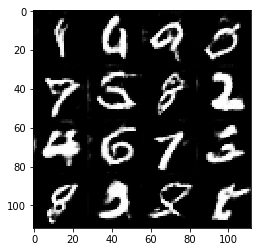

Epoch 2/2... Discriminator Loss: 0.7117... Generator Loss: 2.0768
Epoch 2/2... Discriminator Loss: 1.5030... Generator Loss: 0.5666
Epoch 2/2... Discriminator Loss: 1.0688... Generator Loss: 0.8536
Epoch 2/2... Discriminator Loss: 0.7478... Generator Loss: 1.7153
Epoch 2/2... Discriminator Loss: 0.8065... Generator Loss: 1.4871
Epoch 2/2... Discriminator Loss: 0.9871... Generator Loss: 2.2203
Epoch 2/2... Discriminator Loss: 0.8447... Generator Loss: 2.1271
Epoch 2/2... Discriminator Loss: 1.3321... Generator Loss: 2.4560
Epoch 2/2... Discriminator Loss: 1.7912... Generator Loss: 2.9610
Epoch 2/2... Discriminator Loss: 0.9248... Generator Loss: 1.3315


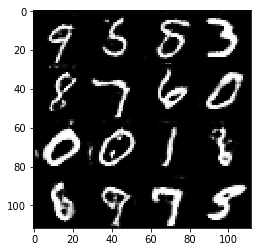

Epoch 2/2... Discriminator Loss: 0.8748... Generator Loss: 1.2671
Epoch 2/2... Discriminator Loss: 0.8293... Generator Loss: 1.2432
Epoch 2/2... Discriminator Loss: 0.9239... Generator Loss: 1.3435
Epoch 2/2... Discriminator Loss: 0.9273... Generator Loss: 1.4092
Epoch 2/2... Discriminator Loss: 1.8715... Generator Loss: 0.4067
Epoch 2/2... Discriminator Loss: 0.9123... Generator Loss: 1.1035
Epoch 2/2... Discriminator Loss: 1.1766... Generator Loss: 0.7392
Epoch 2/2... Discriminator Loss: 1.3400... Generator Loss: 0.6264
Epoch 2/2... Discriminator Loss: 0.8982... Generator Loss: 1.2003
Epoch 2/2... Discriminator Loss: 1.2701... Generator Loss: 2.3930


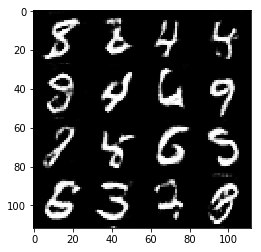

Epoch 2/2... Discriminator Loss: 0.9287... Generator Loss: 1.0443
Epoch 2/2... Discriminator Loss: 1.0866... Generator Loss: 0.8189
Epoch 2/2... Discriminator Loss: 0.6292... Generator Loss: 2.2488
Epoch 2/2... Discriminator Loss: 0.9585... Generator Loss: 1.8415
Epoch 2/2... Discriminator Loss: 0.8902... Generator Loss: 1.6250
Epoch 2/2... Discriminator Loss: 0.8429... Generator Loss: 1.9739
Epoch 2/2... Discriminator Loss: 0.8314... Generator Loss: 1.4678
Epoch 2/2... Discriminator Loss: 0.9864... Generator Loss: 1.8320
Epoch 2/2... Discriminator Loss: 1.1475... Generator Loss: 0.7590
Epoch 2/2... Discriminator Loss: 1.1459... Generator Loss: 0.8061


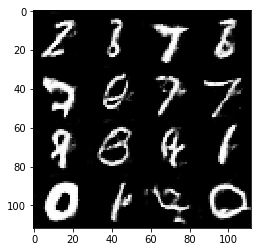

Epoch 2/2... Discriminator Loss: 0.9673... Generator Loss: 3.2214
Epoch 2/2... Discriminator Loss: 1.0272... Generator Loss: 1.0435
Epoch 2/2... Discriminator Loss: 0.8421... Generator Loss: 2.0700
Epoch 2/2... Discriminator Loss: 0.8984... Generator Loss: 1.6107
Epoch 2/2... Discriminator Loss: 2.2448... Generator Loss: 0.2689
Epoch 2/2... Discriminator Loss: 0.8002... Generator Loss: 1.2695
Epoch 2/2... Discriminator Loss: 0.9308... Generator Loss: 1.0034
Epoch 2/2... Discriminator Loss: 0.6475... Generator Loss: 2.1653
Epoch 2/2... Discriminator Loss: 2.5746... Generator Loss: 0.2148
Epoch 2/2... Discriminator Loss: 0.9528... Generator Loss: 1.5676


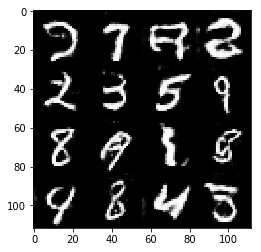

Epoch 2/2... Discriminator Loss: 0.9899... Generator Loss: 1.0288
Epoch 2/2... Discriminator Loss: 0.7221... Generator Loss: 1.5491
Epoch 2/2... Discriminator Loss: 0.7943... Generator Loss: 2.4292
Epoch 2/2... Discriminator Loss: 1.0627... Generator Loss: 2.0078
Epoch 2/2... Discriminator Loss: 3.0970... Generator Loss: 4.4953
Epoch 2/2... Discriminator Loss: 1.2464... Generator Loss: 0.6427
Epoch 2/2... Discriminator Loss: 0.8597... Generator Loss: 1.2242
Epoch 2/2... Discriminator Loss: 0.7363... Generator Loss: 1.6138
Epoch 2/2... Discriminator Loss: 1.5209... Generator Loss: 2.6541
Epoch 2/2... Discriminator Loss: 0.9298... Generator Loss: 1.1107


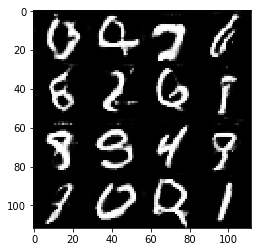

Epoch 2/2... Discriminator Loss: 1.4775... Generator Loss: 0.6520
Epoch 2/2... Discriminator Loss: 0.9989... Generator Loss: 1.6012
Epoch 2/2... Discriminator Loss: 0.7278... Generator Loss: 1.4395
Epoch 2/2... Discriminator Loss: 1.0279... Generator Loss: 1.2180
Epoch 2/2... Discriminator Loss: 0.9857... Generator Loss: 0.9795
Epoch 2/2... Discriminator Loss: 0.7445... Generator Loss: 1.4331
Epoch 2/2... Discriminator Loss: 0.9066... Generator Loss: 1.3735
Epoch 2/2... Discriminator Loss: 1.1900... Generator Loss: 2.0738
Epoch 2/2... Discriminator Loss: 1.4781... Generator Loss: 0.5350
Epoch 2/2... Discriminator Loss: 0.5641... Generator Loss: 2.3699


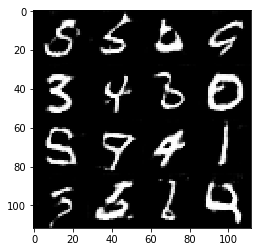

Epoch 2/2... Discriminator Loss: 0.7764... Generator Loss: 1.4001
Epoch 2/2... Discriminator Loss: 1.2613... Generator Loss: 0.7531
Epoch 2/2... Discriminator Loss: 0.9680... Generator Loss: 1.9332
Epoch 2/2... Discriminator Loss: 0.6220... Generator Loss: 2.0923
Epoch 2/2... Discriminator Loss: 1.3959... Generator Loss: 0.5963
Epoch 2/2... Discriminator Loss: 2.2674... Generator Loss: 4.3003
Epoch 2/2... Discriminator Loss: 1.0833... Generator Loss: 1.6104
Epoch 2/2... Discriminator Loss: 0.8954... Generator Loss: 1.1764
Epoch 2/2... Discriminator Loss: 0.8826... Generator Loss: 1.1742
Epoch 2/2... Discriminator Loss: 0.9774... Generator Loss: 1.6460


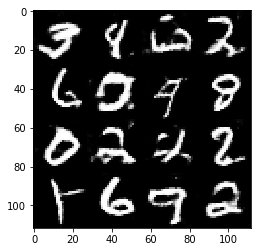

Epoch 2/2... Discriminator Loss: 1.2124... Generator Loss: 2.5842
Epoch 2/2... Discriminator Loss: 0.9080... Generator Loss: 1.3537
Epoch 2/2... Discriminator Loss: 1.1037... Generator Loss: 0.8687
Epoch 2/2... Discriminator Loss: 1.2298... Generator Loss: 2.2770
Epoch 2/2... Discriminator Loss: 1.1475... Generator Loss: 2.1064
Epoch 2/2... Discriminator Loss: 0.9262... Generator Loss: 1.0899
Epoch 2/2... Discriminator Loss: 1.5444... Generator Loss: 0.4660
Epoch 2/2... Discriminator Loss: 2.0661... Generator Loss: 0.3156
Epoch 2/2... Discriminator Loss: 0.6685... Generator Loss: 2.2800
Epoch 2/2... Discriminator Loss: 0.8909... Generator Loss: 1.1269


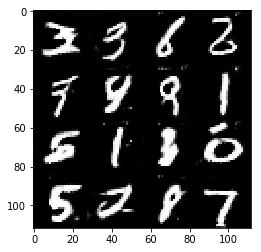

Epoch 2/2... Discriminator Loss: 0.7503... Generator Loss: 1.9070
Epoch 2/2... Discriminator Loss: 1.0951... Generator Loss: 2.9159
Epoch 2/2... Discriminator Loss: 1.1786... Generator Loss: 0.7789
Epoch 2/2... Discriminator Loss: 0.6923... Generator Loss: 2.0516
Epoch 2/2... Discriminator Loss: 1.7111... Generator Loss: 0.4503
Epoch 2/2... Discriminator Loss: 0.7348... Generator Loss: 1.5256
Epoch 2/2... Discriminator Loss: 1.0536... Generator Loss: 2.1770
Epoch 2/2... Discriminator Loss: 0.9894... Generator Loss: 1.0965
Epoch 2/2... Discriminator Loss: 0.6592... Generator Loss: 1.9876
Epoch 2/2... Discriminator Loss: 0.9371... Generator Loss: 1.1478


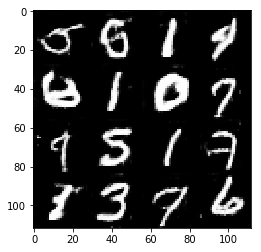

Epoch 2/2... Discriminator Loss: 0.8674... Generator Loss: 2.1459
Epoch 2/2... Discriminator Loss: 1.0635... Generator Loss: 1.0321
Epoch 2/2... Discriminator Loss: 0.6117... Generator Loss: 1.8969
Epoch 2/2... Discriminator Loss: 0.7176... Generator Loss: 1.6071
Epoch 2/2... Discriminator Loss: 1.3860... Generator Loss: 0.6312


IndexError: list index out of range

In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.2840... Generator Loss: 7.5424
Epoch 1/1... Discriminator Loss: 2.7088... Generator Loss: 0.4702
Epoch 1/1... Discriminator Loss: 1.4996... Generator Loss: 0.8066
Epoch 1/1... Discriminator Loss: 1.6882... Generator Loss: 0.4680
Epoch 1/1... Discriminator Loss: 1.8059... Generator Loss: 0.3960
Epoch 1/1... Discriminator Loss: 1.5354... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.7586... Generator Loss: 0.5087
Epoch 1/1... Discriminator Loss: 0.9839... Generator Loss: 1.3329
Epoch 1/1... Discriminator Loss: 1.0623... Generator Loss: 1.0479
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.6587


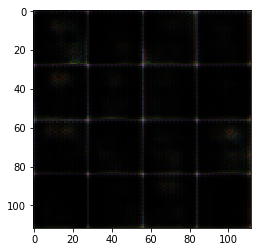

Epoch 1/1... Discriminator Loss: 1.8449... Generator Loss: 0.3909
Epoch 1/1... Discriminator Loss: 1.9471... Generator Loss: 0.3361
Epoch 1/1... Discriminator Loss: 0.8312... Generator Loss: 1.6404
Epoch 1/1... Discriminator Loss: 1.4945... Generator Loss: 0.5929
Epoch 1/1... Discriminator Loss: 1.4812... Generator Loss: 3.0036
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 1.6197
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.3375... Generator Loss: 0.6968
Epoch 1/1... Discriminator Loss: 0.8506... Generator Loss: 2.1439
Epoch 1/1... Discriminator Loss: 2.2820... Generator Loss: 1.3911


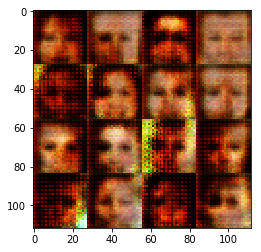

Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 1.2610
Epoch 1/1... Discriminator Loss: 1.5870... Generator Loss: 2.4803
Epoch 1/1... Discriminator Loss: 1.1659... Generator Loss: 1.3093
Epoch 1/1... Discriminator Loss: 1.8573... Generator Loss: 0.4642
Epoch 1/1... Discriminator Loss: 1.3332... Generator Loss: 0.8718
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.7846
Epoch 1/1... Discriminator Loss: 1.4493... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 1.4645... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 2.1742
Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 1.1153


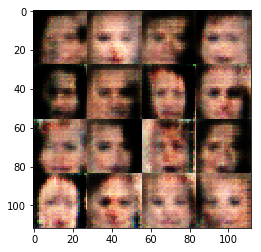

Epoch 1/1... Discriminator Loss: 1.5350... Generator Loss: 0.5238
Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 0.9672
Epoch 1/1... Discriminator Loss: 1.2997... Generator Loss: 0.9511
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 1.0424
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.8880
Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.9228
Epoch 1/1... Discriminator Loss: 1.5169... Generator Loss: 0.6986
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.9686
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.9188
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.9033


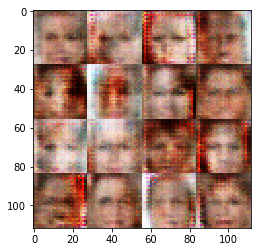

Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.9876
Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 1.0345
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 1.1362
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.9139
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 1.1696
Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 1.0042
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.9201
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.9436
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.9043
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.9988


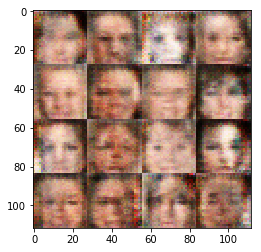

Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 1.1262
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 1.0183
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.8685
Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 1.3361... Generator Loss: 0.8584
Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.9365
Epoch 1/1... Discriminator Loss: 1.3190... Generator Loss: 0.9398
Epoch 1/1... Discriminator Loss: 1.3837... Generator Loss: 0.9928
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 1.0099
Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 0.9318


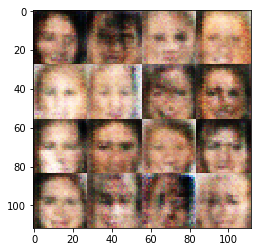

Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.9349
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.8540
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.8850
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 1.0720
Epoch 1/1... Discriminator Loss: 1.5115... Generator Loss: 1.3370
Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 1.1602
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.8586
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.9360
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 1.0262


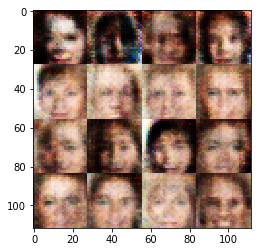

Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.9126
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.9615
Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.7053
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 1.1505
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 1.1035
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 1.0588
Epoch 1/1... Discriminator Loss: 1.3562... Generator Loss: 1.0629
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 1.1553
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.9087
Epoch 1/1... Discriminator Loss: 1.3146... Generator Loss: 1.2098


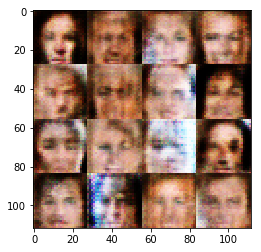

Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 1.3755
Epoch 1/1... Discriminator Loss: 1.3295... Generator Loss: 0.8491
Epoch 1/1... Discriminator Loss: 1.5868... Generator Loss: 1.8392
Epoch 1/1... Discriminator Loss: 1.5685... Generator Loss: 0.4887
Epoch 1/1... Discriminator Loss: 1.3093... Generator Loss: 0.8983
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 1.3026
Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 1.0020
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 1.0215
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 1.0999
Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 1.0280


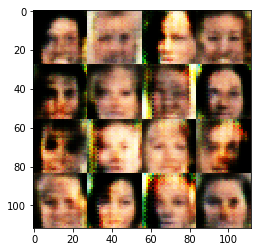

Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.9712
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.9281
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.9998
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.9133
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.8459
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.9807
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 1.0666
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 1.0189
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.8836
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 1.0134


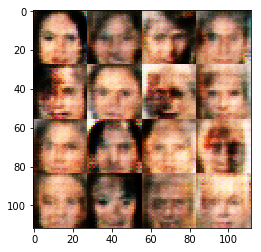

Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.9944
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 1.0794
Epoch 1/1... Discriminator Loss: 1.3087... Generator Loss: 1.0908
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.9770
Epoch 1/1... Discriminator Loss: 1.3275... Generator Loss: 0.8707
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 1.1232
Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 1.0906
Epoch 1/1... Discriminator Loss: 1.3691... Generator Loss: 0.9357
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 1.1383
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 1.0032


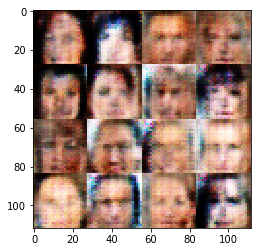

Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 1.3384
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.9214
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.9868
Epoch 1/1... Discriminator Loss: 1.3272... Generator Loss: 1.1257
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 1.3026... Generator Loss: 1.0550
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.8843
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 1.0277
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.9925
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 1.1836


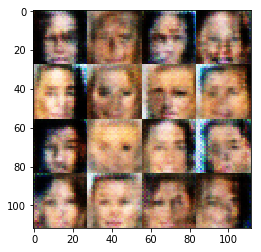

Epoch 1/1... Discriminator Loss: 1.3675... Generator Loss: 0.9553
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 1.0734
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.3076... Generator Loss: 1.0303
Epoch 1/1... Discriminator Loss: 1.3838... Generator Loss: 0.9723
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 1.2094
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 1.1986
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 1.0833
Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 1.0887
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 1.0199


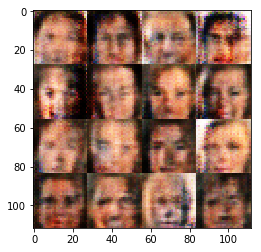

Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 1.1207
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 1.1130
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.8980
Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 1.1318
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.9201
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.9719
Epoch 1/1... Discriminator Loss: 1.3187... Generator Loss: 0.9893
Epoch 1/1... Discriminator Loss: 1.3284... Generator Loss: 0.9786
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.9265
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 1.0936


Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.9816
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.8998
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 1.0195
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 1.0487
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.8900
Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 1.0748
Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 1.0057
Epoch 1/1... Discriminator Loss: 1.3451... Generator Loss: 1.0001
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.9249
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 1.0171


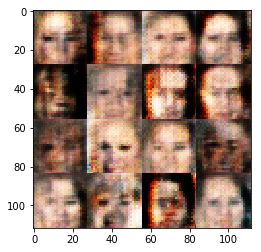

Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 1.1079
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 0.9700
Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.9895
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.9267
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 1.0381
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.9294
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 1.2688
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 1.0168
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 1.0936
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 1.0173


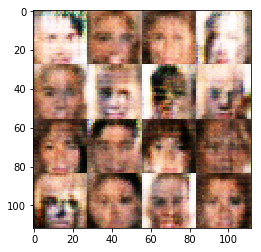

Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 0.9878
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 1.2224
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 1.1602
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 1.3336... Generator Loss: 0.8986
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 1.1785
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 1.0115
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 1.1369
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 1.3170


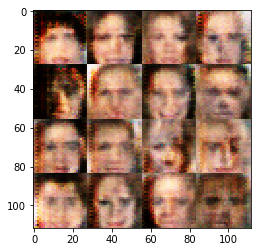

Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 1.2732
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.9291
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.9918
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.9805
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 1.1119
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 1.3456... Generator Loss: 1.2577
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 1.2031
Epoch 1/1... Discriminator Loss: 1.4280... Generator Loss: 1.1805
Epoch 1/1... Discriminator Loss: 1.3165... Generator Loss: 0.9905


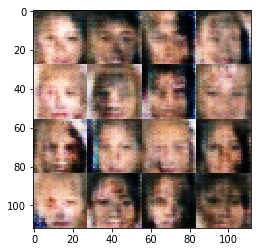

Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.8437
Epoch 1/1... Discriminator Loss: 1.4756... Generator Loss: 1.0982
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.9902
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 1.0406
Epoch 1/1... Discriminator Loss: 1.3166... Generator Loss: 0.9606
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.9045
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 1.0214
Epoch 1/1... Discriminator Loss: 1.3601... Generator Loss: 0.9083
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.8538
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.9608


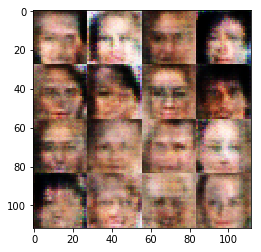

Epoch 1/1... Discriminator Loss: 1.3447... Generator Loss: 1.0092
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 0.9750
Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.8641
Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.9749
Epoch 1/1... Discriminator Loss: 1.3201... Generator Loss: 1.1612
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.8640
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.9012
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.9364
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 1.0821
Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 0.8441


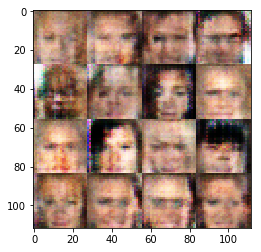

Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 1.0186
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 1.0910
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.9438
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.9364
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 1.1215
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.9257
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.8649
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 1.0229
Epoch 1/1... Discriminator Loss: 1.2900... Generator Loss: 0.9649
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.9951


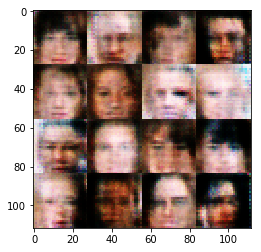

Epoch 1/1... Discriminator Loss: 1.3234... Generator Loss: 0.8981
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 1.0650
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 1.0061
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 1.0625
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 1.1606
Epoch 1/1... Discriminator Loss: 1.3127... Generator Loss: 0.9701
Epoch 1/1... Discriminator Loss: 1.3172... Generator Loss: 0.9407
Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.9212
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.7997


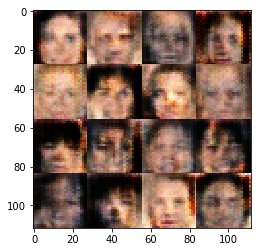

Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.9228
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.9530
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.8807
Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 0.9301
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.9147
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.9085
Epoch 1/1... Discriminator Loss: 1.4092... Generator Loss: 1.4095
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.9956
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 1.0710
Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 1.1552


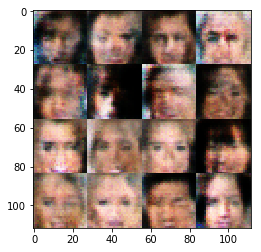

Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.9175
Epoch 1/1... Discriminator Loss: 1.3015... Generator Loss: 0.9901
Epoch 1/1... Discriminator Loss: 1.3561... Generator Loss: 0.7481
Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 1.1172
Epoch 1/1... Discriminator Loss: 1.3495... Generator Loss: 1.1204
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.9492
Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 1.1186
Epoch 1/1... Discriminator Loss: 1.3363... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.9726
Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.9867


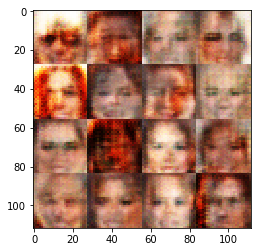

Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.8825
Epoch 1/1... Discriminator Loss: 1.3454... Generator Loss: 1.0494
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.8615
Epoch 1/1... Discriminator Loss: 1.3193... Generator Loss: 1.1933
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.8480
Epoch 1/1... Discriminator Loss: 1.3189... Generator Loss: 0.9128
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 1.0819
Epoch 1/1... Discriminator Loss: 1.3417... Generator Loss: 1.0450
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 1.0047
Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 0.9159


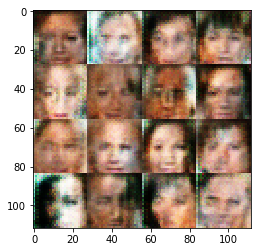

Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.8637
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 1.0864
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 1.0527
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 1.1265
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 1.0010
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 1.0853
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.9833
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.8842
Epoch 1/1... Discriminator Loss: 1.3180... Generator Loss: 1.1326


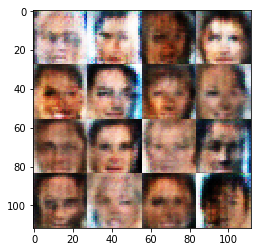

Epoch 1/1... Discriminator Loss: 1.3433... Generator Loss: 0.8439
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 0.9669
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.9200
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.9496
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 0.9624
Epoch 1/1... Discriminator Loss: 1.3190... Generator Loss: 1.0910
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 1.0071
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 1.0147
Epoch 1/1... Discriminator Loss: 1.3619... Generator Loss: 0.9956
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 1.0417


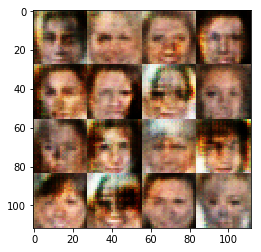

Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 0.9420
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 1.1035
Epoch 1/1... Discriminator Loss: 1.3294... Generator Loss: 1.0225
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 1.0003
Epoch 1/1... Discriminator Loss: 1.2955... Generator Loss: 1.0982
Epoch 1/1... Discriminator Loss: 1.2755... Generator Loss: 1.0193
Epoch 1/1... Discriminator Loss: 1.2830... Generator Loss: 0.8848
Epoch 1/1... Discriminator Loss: 1.3073... Generator Loss: 1.1183
Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 1.1001
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 1.0109


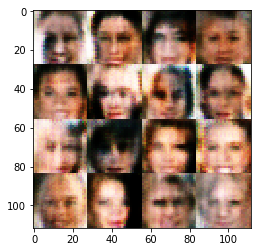

Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.8010
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 1.2988... Generator Loss: 1.0438
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.9752
Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 0.9752
Epoch 1/1... Discriminator Loss: 1.3653... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 1.2219
Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 1.2761
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.9026
Epoch 1/1... Discriminator Loss: 1.2928... Generator Loss: 1.2929


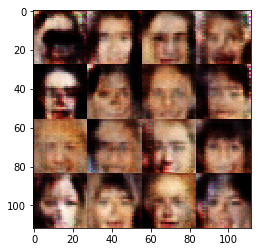

Epoch 1/1... Discriminator Loss: 1.2814... Generator Loss: 0.8803
Epoch 1/1... Discriminator Loss: 1.6539... Generator Loss: 0.5332
Epoch 1/1... Discriminator Loss: 1.3137... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 1.0123
Epoch 1/1... Discriminator Loss: 1.2892... Generator Loss: 0.9099
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 1.0153
Epoch 1/1... Discriminator Loss: 1.2860... Generator Loss: 1.0870
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.9835
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 1.0590


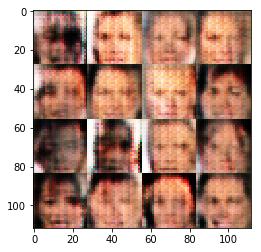

Epoch 1/1... Discriminator Loss: 1.3050... Generator Loss: 0.9820
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.9767
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.9296
Epoch 1/1... Discriminator Loss: 1.3354... Generator Loss: 1.1848
Epoch 1/1... Discriminator Loss: 1.2566... Generator Loss: 0.9592
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 1.0610
Epoch 1/1... Discriminator Loss: 1.3239... Generator Loss: 0.9455
Epoch 1/1... Discriminator Loss: 1.2831... Generator Loss: 0.9609
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 1.1799
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 1.0401


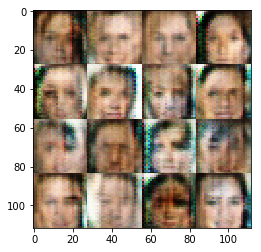

Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.9140
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.7707
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 1.0273
Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.9157
Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 1.0292
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 1.0298
Epoch 1/1... Discriminator Loss: 1.2963... Generator Loss: 0.9489
Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 1.0066
Epoch 1/1... Discriminator Loss: 1.3546... Generator Loss: 0.9310


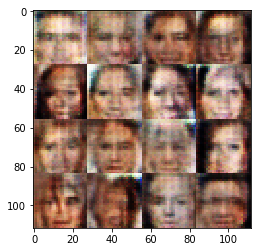

Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.9186
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 1.0211
Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 1.2845... Generator Loss: 0.9209
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.9939
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 1.0065
Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 1.0061
Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 1.0731
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.9938


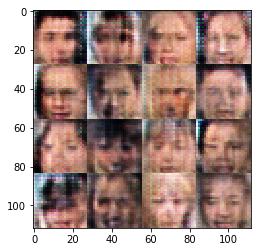

Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 0.9662
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.8770
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.9573
Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.8953
Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 1.0390
Epoch 1/1... Discriminator Loss: 1.3375... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 1.3245... Generator Loss: 0.9161
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 0.8928
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 1.0213


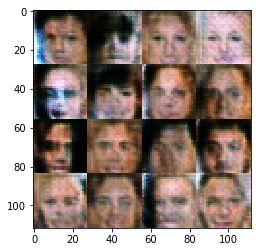

Epoch 1/1... Discriminator Loss: 1.3272... Generator Loss: 0.9393
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 1.0178
Epoch 1/1... Discriminator Loss: 1.3347... Generator Loss: 0.9468
Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 1.0560
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.9675
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.9963
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 1.0249
Epoch 1/1... Discriminator Loss: 1.3156... Generator Loss: 1.0336
Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 1.0298
Epoch 1/1... Discriminator Loss: 1.3619... Generator Loss: 0.9549


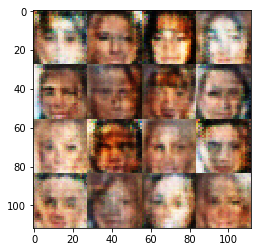

Epoch 1/1... Discriminator Loss: 1.3164... Generator Loss: 1.0070
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 1.0253
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.9661
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.9465
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.9839
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 1.2341
Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 1.0330
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 1.0519
Epoch 1/1... Discriminator Loss: 1.2914... Generator Loss: 1.0247
Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 1.0589


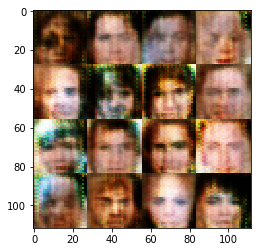

Epoch 1/1... Discriminator Loss: 1.2409... Generator Loss: 1.1300
Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 1.0656
Epoch 1/1... Discriminator Loss: 1.2872... Generator Loss: 1.2596
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.8413
Epoch 1/1... Discriminator Loss: 1.3243... Generator Loss: 1.0929
Epoch 1/1... Discriminator Loss: 1.2919... Generator Loss: 0.9790
Epoch 1/1... Discriminator Loss: 1.3532... Generator Loss: 1.1713
Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.9546
Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 0.9962
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.9520


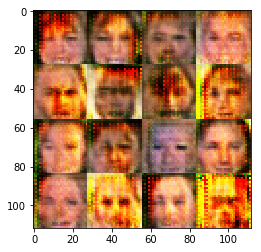

Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 0.9336
Epoch 1/1... Discriminator Loss: 1.3098... Generator Loss: 0.9622
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 1.0322
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.9721
Epoch 1/1... Discriminator Loss: 1.3203... Generator Loss: 0.9354
Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.9881
Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 0.9274
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 1.0854
Epoch 1/1... Discriminator Loss: 1.3407... Generator Loss: 0.9575
Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 0.9985


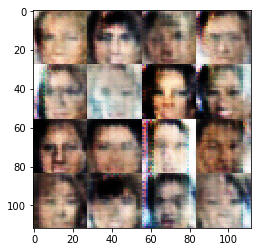

Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 1.3126... Generator Loss: 0.9895
Epoch 1/1... Discriminator Loss: 1.3131... Generator Loss: 0.9973
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.9350
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.9653
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.9141
Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 0.9994
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 1.0011
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 1.0192
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 1.1014


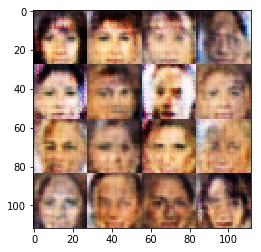

Epoch 1/1... Discriminator Loss: 1.3295... Generator Loss: 0.9478
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 1.0135
Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 0.8930
Epoch 1/1... Discriminator Loss: 1.2957... Generator Loss: 0.9082
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 0.9088
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 1.0299
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.9461
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 1.0540
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.8492
Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.9453


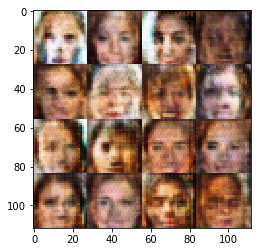

Epoch 1/1... Discriminator Loss: 1.3446... Generator Loss: 0.9330
Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.8954
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.9415
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.9729
Epoch 1/1... Discriminator Loss: 1.2664... Generator Loss: 0.9753
Epoch 1/1... Discriminator Loss: 1.3284... Generator Loss: 1.0436
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 1.0930
Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 0.9175
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 1.0264
Epoch 1/1... Discriminator Loss: 1.2870... Generator Loss: 0.9598


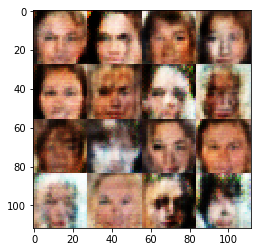

Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 1.0430
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 1.1889
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.9490
Epoch 1/1... Discriminator Loss: 1.3203... Generator Loss: 1.0189
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.9469
Epoch 1/1... Discriminator Loss: 1.3347... Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 1.3104... Generator Loss: 0.9868
Epoch 1/1... Discriminator Loss: 1.3139... Generator Loss: 0.9788
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.9509
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.9979


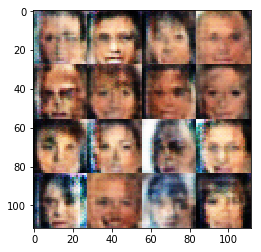

Epoch 1/1... Discriminator Loss: 1.3201... Generator Loss: 1.0415
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.9409
Epoch 1/1... Discriminator Loss: 1.3181... Generator Loss: 0.9783
Epoch 1/1... Discriminator Loss: 1.3176... Generator Loss: 0.9570
Epoch 1/1... Discriminator Loss: 1.2848... Generator Loss: 1.0387
Epoch 1/1... Discriminator Loss: 1.2947... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 0.9613
Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 1.0006
Epoch 1/1... Discriminator Loss: 1.3108... Generator Loss: 0.9284
Epoch 1/1... Discriminator Loss: 1.3264... Generator Loss: 1.0060


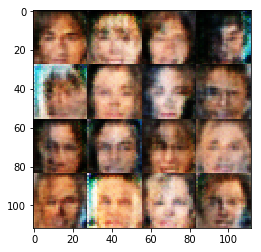

Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.9256
Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 0.9726
Epoch 1/1... Discriminator Loss: 1.3081... Generator Loss: 1.0691
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 0.9598
Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 0.9846
Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 1.0096
Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 1.0240
Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 1.0007
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 1.0549
Epoch 1/1... Discriminator Loss: 1.3080... Generator Loss: 0.9333


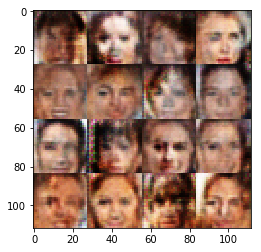

Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 1.0238
Epoch 1/1... Discriminator Loss: 1.2939... Generator Loss: 0.9615
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 1.0777
Epoch 1/1... Discriminator Loss: 1.3407... Generator Loss: 0.9905
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.9727
Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 0.9744
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 0.9482
Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.9991
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 1.0416
Epoch 1/1... Discriminator Loss: 1.2692... Generator Loss: 1.0389


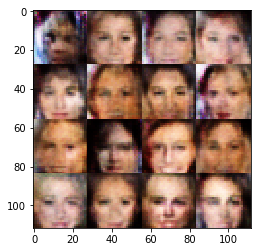

Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 1.1388
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.7750
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.9449
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 1.0030
Epoch 1/1... Discriminator Loss: 1.2913... Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 1.3033... Generator Loss: 0.9776
Epoch 1/1... Discriminator Loss: 1.3074... Generator Loss: 0.9203
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 1.0093
Epoch 1/1... Discriminator Loss: 1.3300... Generator Loss: 1.0017


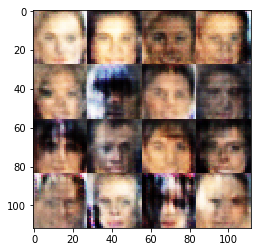

Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 1.0517
Epoch 1/1... Discriminator Loss: 1.3440... Generator Loss: 1.0821
Epoch 1/1... Discriminator Loss: 1.3067... Generator Loss: 1.0030
Epoch 1/1... Discriminator Loss: 1.2906... Generator Loss: 0.9046
Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 1.0653
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.8840
Epoch 1/1... Discriminator Loss: 1.3164... Generator Loss: 0.9797
Epoch 1/1... Discriminator Loss: 1.3288... Generator Loss: 1.0020
Epoch 1/1... Discriminator Loss: 1.2840... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 1.0356


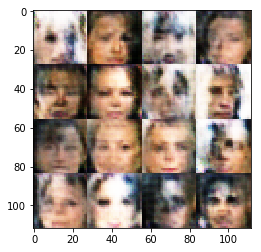

Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.9345
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.9229
Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 1.0311
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.9279
Epoch 1/1... Discriminator Loss: 1.2828... Generator Loss: 0.8916
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 0.9541
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 1.0098
Epoch 1/1... Discriminator Loss: 1.2698... Generator Loss: 1.0667
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 1.0091
Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 0.9359


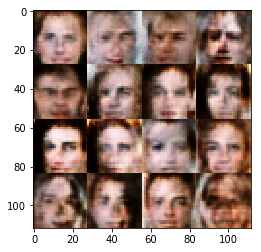

Epoch 1/1... Discriminator Loss: 1.3190... Generator Loss: 0.9911
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.9796
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.9622
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.9003
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.9251
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.9256
Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 1.0234
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 0.9865
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.9536
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 1.0301


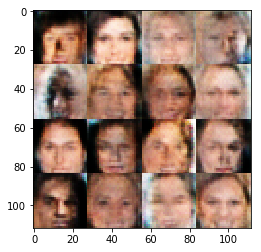

Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 1.0309
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.9968
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 1.1167
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 1.0896
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.9832
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.9591
Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 1.0214
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 1.0037
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.8702


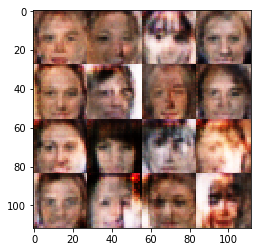

Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 0.9658
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 1.0160
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.9111
Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 1.0152
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 0.9687
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 1.1036
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.9788
Epoch 1/1... Discriminator Loss: 1.3040... Generator Loss: 0.9349
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 1.1290


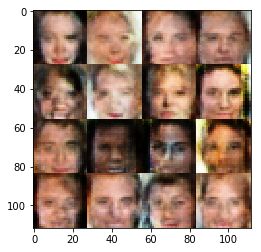

Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 0.9258
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.9761
Epoch 1/1... Discriminator Loss: 1.3100... Generator Loss: 0.9783
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.9729
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 1.0188
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.8925
Epoch 1/1... Discriminator Loss: 1.2882... Generator Loss: 0.9264
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.9749
Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 1.1030
Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 1.0317


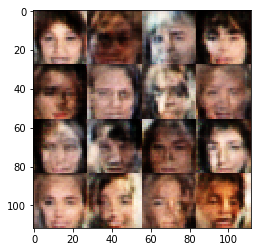

Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.8769
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.9938
Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 1.0543
Epoch 1/1... Discriminator Loss: 1.3162... Generator Loss: 1.0575
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 0.9913
Epoch 1/1... Discriminator Loss: 1.3161... Generator Loss: 1.0046
Epoch 1/1... Discriminator Loss: 1.3027... Generator Loss: 1.0138
Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.9076
Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 1.0083
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 1.0126


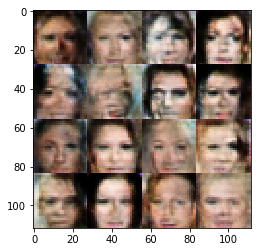

Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 1.0057
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 1.0308
Epoch 1/1... Discriminator Loss: 1.2991... Generator Loss: 1.0507
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.9884
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 1.0097
Epoch 1/1... Discriminator Loss: 1.3208... Generator Loss: 1.0758
Epoch 1/1... Discriminator Loss: 1.3367... Generator Loss: 0.9755
Epoch 1/1... Discriminator Loss: 1.3227... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.3066... Generator Loss: 0.9283
Epoch 1/1... Discriminator Loss: 1.2939... Generator Loss: 0.9580


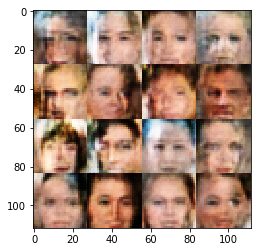

Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 0.9648
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.9695
Epoch 1/1... Discriminator Loss: 1.3175... Generator Loss: 1.0164
Epoch 1/1... Discriminator Loss: 1.3009... Generator Loss: 0.9616
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.9028
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 0.8753
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 1.0231


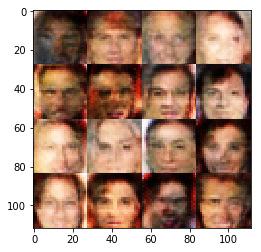

Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 1.0580
Epoch 1/1... Discriminator Loss: 1.3187... Generator Loss: 1.0207
Epoch 1/1... Discriminator Loss: 1.3226... Generator Loss: 1.0047
Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.9764
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 1.0179
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.9990
Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 0.9422
Epoch 1/1... Discriminator Loss: 1.3411... Generator Loss: 0.9107
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 1.3314... Generator Loss: 0.9532


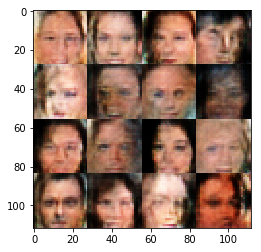

Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 1.0921
Epoch 1/1... Discriminator Loss: 1.2916... Generator Loss: 1.0790
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 1.0579
Epoch 1/1... Discriminator Loss: 1.2959... Generator Loss: 0.9707
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 1.0451
Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 0.9570
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.8716
Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 0.9674
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.9705
Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 0.9567


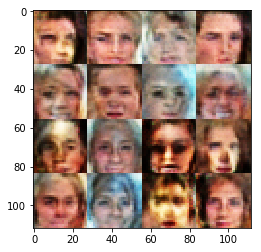

Epoch 1/1... Discriminator Loss: 1.3057... Generator Loss: 0.9950
Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.9964
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 1.0221
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 0.9717
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 1.0179
Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 1.0199
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.9511
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.9420
Epoch 1/1... Discriminator Loss: 1.3241... Generator Loss: 1.0269
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.8883


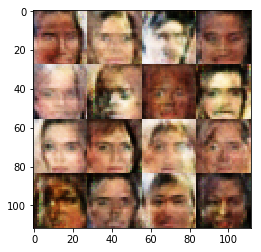

Epoch 1/1... Discriminator Loss: 1.3176... Generator Loss: 1.0212
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.9608
Epoch 1/1... Discriminator Loss: 1.2933... Generator Loss: 0.9501
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 0.9676
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 1.2605
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.9022
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 1.0222
Epoch 1/1... Discriminator Loss: 1.2931... Generator Loss: 0.8681


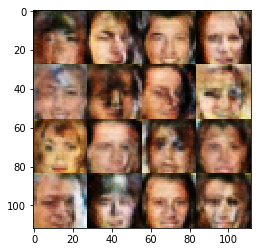

Epoch 1/1... Discriminator Loss: 1.3066... Generator Loss: 1.1002
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 1.0311
Epoch 1/1... Discriminator Loss: 1.3066... Generator Loss: 0.9099
Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.8706
Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.9886
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 1.0112
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 1.0204
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 1.0378
Epoch 1/1... Discriminator Loss: 1.2805... Generator Loss: 0.9139
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 1.0055


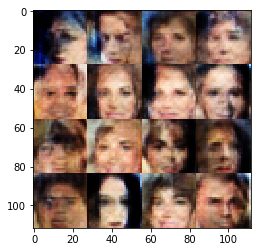

Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 0.9050
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 1.0914
Epoch 1/1... Discriminator Loss: 1.2615... Generator Loss: 0.9164
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.9441
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.8571
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.9180
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 1.2026
Epoch 1/1... Discriminator Loss: 1.3206... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 1.2881... Generator Loss: 1.0000


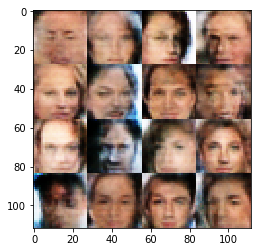

Epoch 1/1... Discriminator Loss: 1.2960... Generator Loss: 1.0699
Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 0.9265
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.9739
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.9584
Epoch 1/1... Discriminator Loss: 1.3160... Generator Loss: 0.9165
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.9692
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.8872
Epoch 1/1... Discriminator Loss: 1.3050... Generator Loss: 1.0560
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 0.9896
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.8631


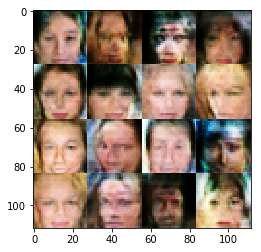

Epoch 1/1... Discriminator Loss: 1.3392... Generator Loss: 0.9456
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 0.9794
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.9948
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.8687
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.9596
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.8595
Epoch 1/1... Discriminator Loss: 1.3148... Generator Loss: 0.8499
Epoch 1/1... Discriminator Loss: 1.2856... Generator Loss: 1.1100
Epoch 1/1... Discriminator Loss: 1.3242... Generator Loss: 0.9022
Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 0.9858


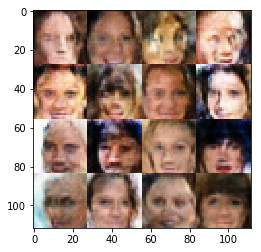

Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 1.0778
Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 1.0202
Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 0.9691


IndexError: list index out of range

In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.